In [13]:
import tflite_runtime.interpreter as tflite
import pickle
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
labels = ['LEFT MIN','LEFT MAX','FORWARD', 'RIGHT MIN', 'RIGHT MAX']

In [73]:
with(open('resources/train_images/dados_2021_08_31_20_12_13.606412_315_imagens','rb')) as openfile:
    dados_brutos = pickle.load(openfile)

In [74]:
with(open('resources/train_images/dados_2021_08_31_20_29_55.928042_298_imagens','rb')) as openfile:
    tuplas_2 = pickle.load(openfile)

In [75]:
for tupla in tuplas_2:
    dados_brutos.append(tupla)

In [86]:
interpreter = tflite.Interpreter('models/mlp_model.tflite')

In [87]:
interpreter.allocate_tensors()

In [88]:
idx = 44
test_img = cv.cvtColor(dados_brutos[idx][0],cv.COLOR_RGB2GRAY)
test_label = dados_brutos[idx][1]
test_img = np.array(test_img, dtype=np.float32) / 255.0
test_img = test_img[np.newaxis, ..., np.newaxis]
test_label

'RIGHT MAX'

In [89]:
interpreter.set_tensor(0,test_img)

In [90]:
interpreter.invoke()

In [91]:
output = interpreter.get_tensor(10)
output

array([[1.1629793e-04, 1.0322048e-03, 1.1261383e-03, 5.4919172e-05,
        9.9767047e-01]], dtype=float32)

In [92]:
labels[output.argmax()]

'RIGHT MAX'

In [108]:
def get_direction(image):
    image = cv.cvtColor(image,cv.COLOR_RGB2GRAY)
    image = np.array(image, dtype=np.float32) / 255.0
    image = image[np.newaxis, ..., np.newaxis]
    interpreter.set_tensor(0,image)
    interpreter.invoke()
    output = interpreter.get_tensor(10)
    return labels[output.argmax()]

In [109]:
len(dados_brutos)

613

# Comparando a saída da rede

* A primeira coluna mostra a imagem capturada pela câmera
* A segunda coluna mostra a ação que foi feita pelo "condutor" humano
* A terceira coluna mostra a ação que a RNA tomaria para essa imagem

In [121]:
qnt_imagens = 100
indices = random.sample(range(len(dados_brutos)),qnt_imagens)

In [122]:
text_kwargs = dict(ha='center', va='center', fontsize=12, color='black')

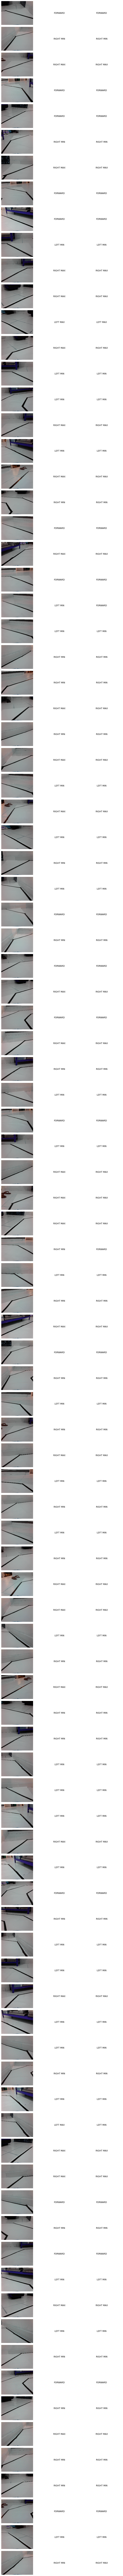

In [123]:
fig, axs = plt.subplots(qnt_imagens,3,figsize=(10,2*qnt_imagens))
for i,idx in enumerate(indices):
    axs[i,0].imshow(dados_brutos[idx][0],aspect='equal')
    axs[i,0].set_axis_off()
    axs[i,1].text(0.5, 0.5, f'{dados_brutos[idx][1]}', **text_kwargs)
    axs[i,1].set_axis_off()
    axs[i,2].text(0.5, 0.5, get_direction(dados_brutos[idx][0]), **text_kwargs)
    axs[i,2].set_axis_off()
plt.tight_layout()    
plt.show()